# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. \[You will learn about PCA in a later Lesson.\] Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

You can read more about the data and the variables [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [190]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [191]:
# We read in the dataset and display the first 5 rows as follows
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [192]:
# We define the predictor variables and the outcome response variables as follows
x = df.Amount.values
n = len(df.index)
X = np.c_[np.ones(n),x]
y = df.Class.values
# We split the predictor variables and outcome response into train and test sets as follows
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)


## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

** LogisticRegression uses a penalty by default, in fact it uses l2 regularization by default. ** 
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

** If we apply a penalty during learning, we expect the coefficients to be smaller values relative to if we did not apply a penalty during the learning. ** 
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**If using the default settings the fit intercept value is set to true, thus sklearn will include a column of 1s in the design matrix, thus we should not include one in our design matrix. ** 


## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  I used `max_iter=10000` which seems to supress the warning.

Using this object, **run a logisitic regression analysis** of `Class` (y-variable) against `Amount` (x-variable) using your training data. 

Then **make a plot with three main components based on the analysis**:
1. Scatter-plot of `Amount` and `Outcome` on your test data
2. A curve showing the prediction (0 or 1, using `predict` - this curve will jump between 0 and 1) as a function of `Amount`
3. A curve showing the predicted probability of a positive outcome (using `predict_proba`) as a function of `Amount`. Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1) in an array.

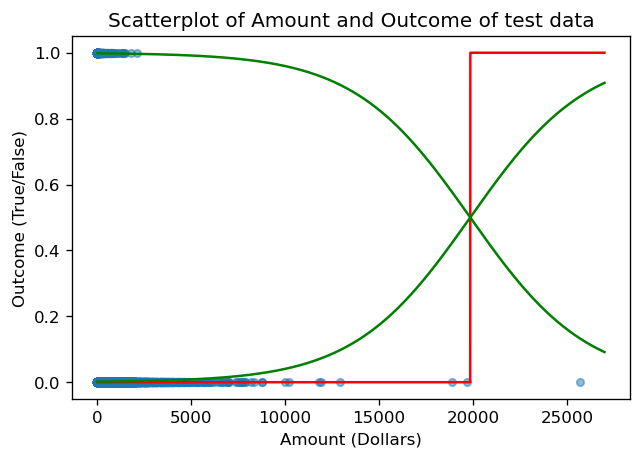

In [193]:
# We create sklearn LogisticRegression object with unpenalized logistic regression
AMTLR = LogisticRegression(penalty='none', max_iter=1000)
# We run a logistic regression analysis of class against amount using the data as follows
amtlr = AMTLR.fit(Xtrain,ytrain)

# Scatterplot the data. 
fig, ax = plt.subplots(dpi = 120)
df.plot.scatter(x = 'Amount', y = 'Class', alpha = 0.5, ax = ax)
ax.set_xlabel('Amount (Dollars)')
ax.set_ylabel('Outcome (True/False)')
ax.set_title('Scatterplot of Amount and Outcome of test data')


# Find the maximum likelihood estimates for the coefficients for this data

# Make predictions on new data
newx = np.linspace(0,27000,1000000)
newX = np.c_[np.ones(1000000),newx]

# Make predictions on the new data
y_predicted= amtlr.predict(newX)

#Finally, plot the predictions on the same axis and color the predictions red
plt.plot(newx, y_predicted, c='red')

# We plot the predicted probability of a positive outcome in green
y_predicted_proba= amtlr.predict_proba(newX)
plt.plot(newx, y_predicted_proba, c='green')


## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your amount-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**There was one test instance labelled positive by the classifier:** 

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**The classifier labelled the positive test instance because the amount was very high >25000:** 

* Is this classifier useful for finding fraudulent transactions? Explain in one or two sentences.

** No the classifier is not useful for finding positive transactions, it has a very low precision, recall and sensitivity, in other words, it has limited use in determining if there will be a fraudulent transaction as there will be barely any true positive values at all, so it has little value.:** 


In [194]:
# Calculate performance measures from scratch
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:

# We compute y_hat using the model and 
ytest_prob = amtlr.predict_proba(Xtest)
yhat = amtlr.classes_[(ytest_prob[:,1]>0.5).astype(int)]
compute_performance(y_hat, ytest,amtlr.classes_)

# Now we get a the index of a positive prediction and check the amount
i = np.where(yhat==1)
print(Xtest[i])
## Thus the value with the positive prediction has an amount of greater than 25000, so a high amount is positive



tp: 154 tn: 142133 fp: 28 fn: 89
Accuracy: 0.999 Recall: 0.634 Precision: 0.846 Sensitivity: 0.634 Specificity: 1.0
[[1.000000e+00 2.569116e+04]]


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame (except for `Class`) in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Amounts more strongly associated with fraud, if all other variables are held equal?

**The coefficient is negative thus smaller amounts are more strongly associated with fraud if all other variables are held equal.:** 


In [195]:
# We define the predictor variables and the outcome response variables as follows
X = df.drop('Class', axis='columns').values
y = df.Class.values
# We split the predictor variables and outcome response into train and test sets as follows
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X, y, test_size=0.5, random_state=0)

# We create sklearn LogisticRegression object with unpenalized logistic regression
ALLLR = LogisticRegression(penalty='none', max_iter=1000)
# We run a logistic regression analysis of class against amount using the data as follows
alllr = ALLLR.fit(Xtrain2,ytrain2)
amountcoef = alllr.coef_[0][29]
print(amountcoef)
##The coefficient is negative thus smaller amounts are more strongly associated with fraud if all other variables are held equal.


-0.006352775934794622


## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**There are 182 test instances labelled positive, positive intances are tp+fp=154+28=182:** 

* Is this classifier **better or worse than the amount-only classifier** for finding fraudulent transactions? Explain in one or two sentences.*

** This classifier is better than the amount only classifier, it has a higher accuracy, recall, precision and sensitivity than the amount only classifier. Thus it is far better for finding fraudulent transactions, in particular the recall and precision are higher, thus it is better for finding fraudulent transactions as those are indicate that we effectively find classify the positive or fraudent values.:** 


In [196]:
# We compute the label criteria in lesson for the new classifier using the test data
y_hat = alllr.predict(Xtest2)
compute_performance(y_hat, ytest2, alllr.classes_)
# positive intances are tp+fp=154+28=182



tp: 154 tn: 142133 fp: 28 fn: 89
Accuracy: 0.999 Recall: 0.634 Precision: 0.846 Sensitivity: 0.634 Specificity: 1.0


0.42178603619387894

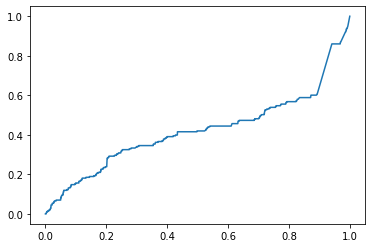

In [197]:
# ROC for Amount-only classifier
ytest_prob = amtlr.predict_proba(Xtest)
# ROC using sklearns ROC curve. 
fpr, tpr, _ = roc_curve(ytest, ytest_prob[:,1])
ax=sns.lineplot(fpr,tpr)
# We get the AUROC score
auc(fpr,tpr)
# AURUC of 0.42 is worse than random of 0.05


0.9275270491872326

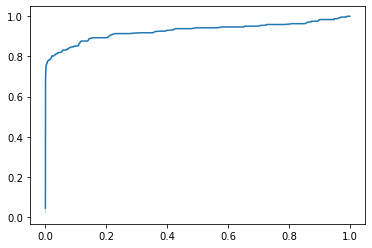

In [198]:
# ROC for all-variable classifier
ytest_prob = alllr.predict_proba(Xtest2)
# ROC using sklearns ROC curve. 
fpr, tpr, _ = roc_curve(ytest2, ytest_prob[:,1])
ax=sns.lineplot(fpr,tpr)
auc(fpr,tpr)



# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 60% of fraudulent transactions?

** The classifier will all the variables is preferable if we want to recover at least 60% of the transactions is preferable because if we make precision over 0.6 than recall is much higher, it is clear from the PRC of the second classifier that it is much prerrable by examing that the PRC is higher when Precision is greater than 0.6, thus we chose the classifier with all variables, as required.** 


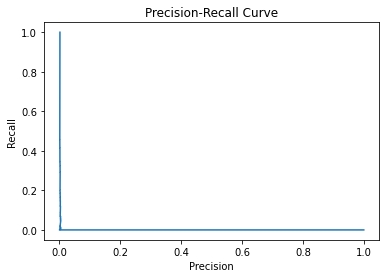

In [199]:
# PRC for Amount-only classifier
y_score = amtlr.decision_function(Xtest)
# We use the prc function from sklearn and matplotlib to plot and label the axis
precision, recall, threshold = precision_recall_curve(ytest,y_score)
plt.plot(precision,recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.show()


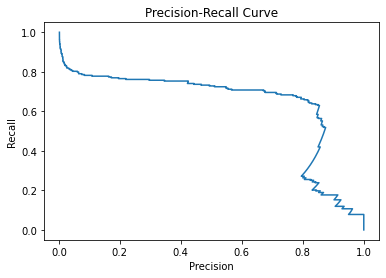

In [200]:
# PRC for all-variable classifier
y_score = alllr.decision_function(Xtest2)
# We use the prc function from sklearn and matplotlib to plot and label the axis
precision, recall, threshold = precision_recall_curve(ytest2,y_score)
plt.plot(precision,recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.show()